# INSTRUCTIONS 

Because time is short, this homework is graded as mostly extra credit. 

You will score one point for using the correct file name, and one extra credit point for each model you run below.

Follow the prompts in the attached jupyter notebook. 
Download the data and place it in your working directory, or modify the path to upload it to your notebook. 
Add markdown cells to your analysis to include your solutions, comments, answers. 
**Add as many cells as you need**. For easy readability comment when possible.


**Title: 1985 Auto Imports Database**

Relevant Information:
   -- Description
      This data set consists of three types of entities: (a) the
      specification of an auto in terms of various characteristics, (b)
      its assigned insurance risk rating, (c) its normalized losses in use
      as compared to other cars.  The second rating corresponds to the
      degree to which the auto is more risky than its price indicates.
      Cars are initially assigned a risk factor symbol associated with its
      price.   Then, if it is more risky (or less), this symbol is
      adjusted by moving it up (or down) the scale.  Actuarians call this
      process "symboling".  A value of +3 indicates that the auto is
      risky, -3 that it is probably pretty safe.

      The third factor is the relative average loss payment per insured
      vehicle year.  This value is normalized for all autos within a
      particular size classification (two-door small, station wagons,
      sports/speciality, etc...), and represents the average loss per car
      per year.

   -- Note: Several of the attributes in the database could be used as a
            "class" attribute.

5. Number of Instances: 205

6. Number of Attributes: 26 total
   -- 15 continuous
   -- 1 integer
   -- 10 nominal

7. Attribute Information:     
     Attribute:                Attribute Range:
     ------------------        -----------------------------------------------
  1. symboling:                -3, -2, -1, 0, 1, 2, 3.
  2. normalized-losses:        continuous from 65 to 256.
  3. make:                     alfa-romero, audi, bmw, chevrolet, dodge, honda,isuzu, jaguar, mazda, mercedes-benz, mercury, mitsubishi, nissan, peugot, plymouth, porsche, renault, saab, subaru, toyota,volkswagen, volvo
  4. fuel-type:                diesel, gas.
  5. aspiration:               std, turbo.
  6. num-of-doors:             four, two.
  7. body-style:               hardtop, wagon, sedan, hatchback, convertible.
  8. drive-wheels:             4wd, fwd, rwd.
  9. engine-location:          front, rear.
 10. wheel-base:               continuous from 86.6 120.9.
 11. length:                   continuous from 141.1 to 208.1.
 12. width:                    continuous from 60.3 to 72.3.
 13. height:                   continuous from 47.8 to 59.8.
 14. curb-weight:              continuous from 1488 to 4066.
 15. engine-type:              dohc, dohcv, l, ohc, ohcf, ohcv, rotor.
 16. num-of-cylinders:         eight, five, four, six, three, twelve, two.
 17. engine-size:              continuous from 61 to 326.
 18. fuel-system:              1bbl, 2bbl, 4bbl, idi, mfi, mpfi, spdi, spfi.
 19. bore:                     continuous from 2.54 to 3.94.
 20. stroke:                   continuous from 2.07 to 4.17.
 21. compression-ratio:        continuous from 7 to 23.
 22. horsepower:               continuous from 48 to 288.
 23. peak-rpm:                 continuous from 4150 to 6600.
 24. city-mpg:                 continuous from 13 to 49.
 25. highway-mpg:              continuous from 16 to 54.
 26. price:                    continuous from 5118 to 45400.

8. Missing Attribute Values: (denoted by "?")

## Note: It may be necessary to install the mlxtend package before the "plot_confusion_matrix". 

"conda install -c conda-forge mlxtend" should do it, or see: https://anaconda.org/conda-forge/mlxtend

As originally presented, the homework followed previous ones where the data wrangling was performed. The data wrangling is done for you here, and is not part of the homework.

In [1]:
from scipy import stats
from sklearn.linear_model import LinearRegression
from statsmodels.compat import lzip
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from numpy import where
from collections import Counter
from sklearn.datasets import make_blobs
from matplotlib import pyplot
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.covariance import EllipticEnvelope
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.metrics import auc
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.svm import SVC
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from collections import Counter
from sklearn.dummy import DummyClassifier
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from numpy import mean
print ("done")

%matplotlib inline

done


In [3]:
#Read in data

df_k =pd.read_csv("'C:\\Users\\kiran\\Downloads\\auto_imports1.csv")
df_k.head()

,fuel_type,body,wheel_base,length,width,heights,curb_weight,engine_type,cylinders,engine_size,bore,stroke,compression,horse_power,peak_rpm,city_mpg,highway_mpg,price
0,gas,convertible,88.6,168.8,64.1,48.8,2548,dohc,four,130,3.47,2.68,9.0,111,5000,21,27,13495
1,gas,convertible,88.6,168.8,64.1,48.8,2548,dohc,four,130,3.47,2.68,9.0,111,5000,21,27,16500
2,gas,hatchback,94.5,171.2,65.5,52.4,2823,ohcv,six,152,2.68,3.47,9.0,154,5000,19,26,16500
3,gas,sedan,99.8,176.6,66.2,54.3,2337,ohc,four,109,3.19,3.4,10.0,102,5500,24,30,13950
4,gas,sedan,99.4,176.6,66.4,54.3,2824,ohc,five,136,3.19,3.4,8.0,115,5500,18,22,17450


# Data Wrangling

### Check what types of variables do you have in your data? Do you see anything that doesn't make sense? *Hint: horse power is  an object ?!*

In [4]:
df_k.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   fuel_type    201 non-null    object 
 1   body         201 non-null    object 
 2   wheel_base   201 non-null    float64
 3   length       201 non-null    float64
 4   width        201 non-null    float64
 5   heights      201 non-null    float64
 6   curb_weight  201 non-null    int64  
 7   engine_type  201 non-null    object 
 8   cylinders    201 non-null    object 
 9   engine_size  201 non-null    int64  
 10  bore         201 non-null    object 
 11  stroke       201 non-null    object 
 12  compression  201 non-null    float64
 13  horse_power  201 non-null    object 
 14  peak_rpm     201 non-null    object 
 15  city_mpg     201 non-null    int64  
 16  highway_mpg  201 non-null    int64  
 17  price        201 non-null    int64  
dtypes: float64(5), int64(5), object(8)
memory usage: 2

### Replace '?' with None

In [5]:
df_k.replace({'?': None},inplace =True)

### Change the variables: bore, stroke, horse_power, peak_rpm to float64

In [6]:
## Your code here

df_k[['bore', 'stroke', 'horse_power', 'peak_rpm']] = df[['bore', 'stroke', 'horse_power', 'peak_rpm']].apply(pd.to_numeric, axis = 1)

In [7]:
df_k.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   fuel_type    201 non-null    object 
 1   body         201 non-null    object 
 2   wheel_base   201 non-null    float64
 3   length       201 non-null    float64
 4   width        201 non-null    float64
 5   heights      201 non-null    float64
 6   curb_weight  201 non-null    int64  
 7   engine_type  201 non-null    object 
 8   cylinders    201 non-null    object 
 9   engine_size  201 non-null    int64  
 10  bore         197 non-null    float64
 11  stroke       197 non-null    float64
 12  compression  201 non-null    float64
 13  horse_power  199 non-null    float64
 14  peak_rpm     199 non-null    float64
 15  city_mpg     201 non-null    int64  
 16  highway_mpg  201 non-null    int64  
 17  price        201 non-null    int64  
dtypes: float64(9), int64(5), object(4)
memory usage: 2

### Drop body,engine_type,cylinders columns and name the new dataframe df2

In [8]:
## Your code here

df2=df.drop(['body','engine_type','cylinders'], axis=1)

In [9]:
df2.head()

,fuel_type,wheel_base,length,width,heights,curb_weight,engine_size,bore,stroke,compression,horse_power,peak_rpm,city_mpg,highway_mpg,price
0,gas,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,13495
1,gas,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,16500
2,gas,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154.0,5000.0,19,26,16500
3,gas,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102.0,5500.0,24,30,13950
4,gas,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115.0,5500.0,18,22,17450


### Are there any null (NA) values in the data? If so, drop them and confirm they are gone

In [10]:
df2.isnull().sum()

fuel_type      0
wheel_base     0
length         0
width          0
heights        0
curb_weight    0
engine_size    0
bore           4
stroke         4
compression    0
horse_power    2
peak_rpm       2
city_mpg       0
highway_mpg    0
price          0
dtype: int64

In [11]:
df2=df2.dropna()

In [12]:
df2.isnull().sum()

fuel_type      0
wheel_base     0
length         0
width          0
heights        0
curb_weight    0
engine_size    0
bore           0
stroke         0
compression    0
horse_power    0
peak_rpm       0
city_mpg       0
highway_mpg    0
price          0
dtype: int64

### Replace ['gas', 'diesel'] string values with [0, 1]

In [13]:
df2.fuel_type.replace(to_replace=['gas', 'diesel'], value=[0, 1], inplace=True)
df2

,fuel_type,wheel_base,length,width,heights,curb_weight,engine_size,bore,stroke,compression,horse_power,peak_rpm,city_mpg,highway_mpg,price
0,0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,13495
1,0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,16500
2,0,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154.0,5000.0,19,26,16500
3,0,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102.0,5500.0,24,30,13950
4,0,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115.0,5500.0,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,0,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,114.0,5400.0,23,28,16845
197,0,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,160.0,5300.0,19,25,19045
198,0,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,134.0,5500.0,18,23,21485
199,1,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,106.0,4800.0,26,27,22470


### Define your X and y: your dependent variable is fuel_type, the rest of the variables are your independent variables

In [14]:
## your code goes here

X=df2.drop(['fuel_type'], axis=1)
y = df2['fuel_type']

### Split your data into training and testing set. Use test_size=0.3, random_state=746

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=746)

In [16]:
Counter(y_train)

Counter({1: 11, 0: 125})

## 1. Use Logistic regression to classify your data. Print/report your confusion matrix, classification report and AUC

In [17]:
#Code goes here
#logistic regression

model_logistic = LogisticRegression()
model_logistic.fit(X_train, y_train)

y_pred = model_logistic.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix for Logistic Regression:\n", conf_matrix)

Confusion Matrix for Logistic Regression:
 [[50  0]
 [ 0  9]]


C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [18]:
class_report = classification_report(y_test, y_pred)
print("Classification Report for Logistic Regression:\n", class_report)

Classification Report for Logistic Regression:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00         9

    accuracy                           1.00        59
   macro avg       1.00      1.00      1.00        59
weighted avg       1.00      1.00      1.00        59



In [19]:
auc = roc_score_auc(y_test, y_pred)
print("AUC for Logistic Regression:", au)

AUC for Logistic Regression: 1.0


## 2. Use Naive Bayes to classify your data. Print/report your confusion matrix, classification report and AUC

In [20]:
#Code goes here
#Naive Bayes


model_NB = GaussianNB()

model_NB.fit(X_train, y_train)

y_pred = model_NB.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix for Naive Baye's:\n", conf_matrix)

Confusion Matrix for Naive Baye's:
 [[50  0]
 [ 0  9]]


In [21]:
class_report = classification_report(y_test, y_pred)
print("Classification Report for Naive Baye's:\n", class_report)

Classification Report for Naive Baye's:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00         9

    accuracy                           1.00        59
   macro avg       1.00      1.00      1.00        59
weighted avg       1.00      1.00      1.00        59



In [22]:
auc = roc_auc_score(y_test, y_pred)
print("AUC for Naive Baye's:", auc)

AUC for Naive Baye's: 1.0


## 3. Use a Support Vector Machine Classifier to classify your data.  Print/report your confusion matrix, classification report and AUC.

In [23]:
#Code goes here
# SVC

model_SVC = SVC()

model_SVC.fit(X_train, y_train)

y_pred = model_SVC.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix for Support Vector Classifier:\n", conf_matrix)

Confusion Matrix for Support Vector Classifier:
 [[50  0]
 [ 9  0]]


In [24]:
class_report = classification_report(y_test, y_pred)
print("Classification Report for Support Vector Classifier:\n", class_report)

Classification Report for Support Vector Classifier:
               precision    recall  f1-score   support

           0       0.85      1.00      0.92        50
           1       0.00      0.00      0.00         9

    accuracy                           0.85        59
   macro avg       0.42      0.50      0.46        59
weighted avg       0.72      0.85      0.78        59



C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [25]:
auc = roc_auc_score(y_test, y_pred)
print("AUC for Support Vector Classifier:", auc)

AUC for Support Vector Classifier: 0.5


## 4. Use KNN to classify your data. First find the optimal k and than run your classification. Print/report your confusion matrix, classification report and AUC

In [26]:
#Code goes here
#KNN - find optimal K

k_values = list(range(1, 10))
cv_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())
optimal_k = k_values[cv_scores.index(max(cv_scores))]
print(f'Optimal k: {optimal_k}')

Optimal k: 2


In [27]:
#Code goes here
#Train classifier on the optimal k that we chose from the plot

model_kNN = KNeighborsClassifier(n_neighbors=optimal_k)
model_kNN.fit(X_train, y_train)
y_pred = model_SVC.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Confusion Matrix for kNN:\n", 
      conf_matrix)

Confusion Matrix for kNN:
 [[50  0]
 [ 9  0]]


In [28]:
class_report = classification_report(y_test, y_pred)

print("Classification Report for kNN:\n",
      class_report)

Classification Report for kNN:
               precision    recall  f1-score   support

           0       0.85      1.00      0.92        50
           1       0.00      0.00      0.00         9

    accuracy                           0.85        59
   macro avg       0.42      0.50      0.46        59
weighted avg       0.72      0.85      0.78        59



C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [29]:
auc = roc_auc_score(y_test, y_pred)


print("AUC for kNN:", auc)

AUC for kNN: 0.5


## 5. Use Random Forest to classify your data. Print/report your confusion matrix, classification report and AUC

NOTE: This can take several seconds to train. Be patient.

In [30]:
#Code goes here
# random forest
model_RFC = RandomForestClassifier()
model_RFC.fit(X_train, y_train)



y_pred = model_RFC.predict(X_test)

In [31]:
#Random forest reports

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix for Random Forest:\n", 
      conf_matrix)

Confusion Matrix for Random Forest:
 [[50  0]
 [ 0  9]]


In [32]:
class_report = classification_report(y_test, y_pred)
print("Classification Report for Random Forest:\n", 
      class_report)

Classification Report for Random Forest:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00         9

    accuracy                           1.00        59
   macro avg       1.00      1.00      1.00        59
weighted avg       1.00      1.00      1.00        59



In [33]:
auc = roc_auc_score(y_test, y_pred)
print("AUC for Random Forest:", auc)

AUC for Random Forest: 1.0


## 6. Which models performed best with this data set? Which performed worst? Which metric did you use for your criterion?

# For this data set Logistic Regression, Naive Baye's and Random Forest fits good and unfortunately, K nearest neibours and Svc works worst and further we use  metric AUC score as criterion

## 7. The target data (fuel_type) is imbalanced. Display a bar chart showing this imbalance.

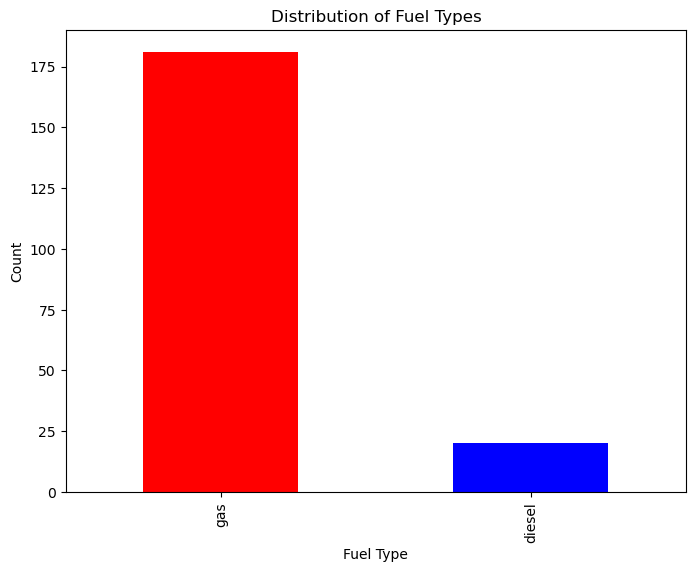

In [34]:
plt.figure(figsize=(10, 12))
df['fuel_type'].value_counts().plot(kind='bar', color=['Orange', 'Blue'])
plt.title('Distribution of Fuel Types')
plt.xlabel('Fuel Type')
plt.ylabel('Count')
plt.show()

## 8. Fix the imbalanced nature of the data using one of the methods discussed in class. Re-run one of the "failed" classification methods with the balanced data set and see if you get better results.

In [35]:
y_train.value_counts()

0    125
1     11
Name: fuel_type, dtype: int64

In [36]:
#Fix imbalance. Code goes here.
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_train_sampled, y_train_sampled = smote.fit_resample(X_train, y_train)

In [37]:
y_train_sampled.value_counts()

1    125
0    125
Name: fuel_type, dtype: int64

In [38]:
#Re-run classification method with a poorly-performing method from steps 1-5

## Support Vector Classifier - Resampled

In [39]:
model_SVC = SVC()
model_SVC.fit(X_train_sampled, y_train_sampled)
y_pred = model_SVC.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix for Support Vector Classifier Resampled:\n", conf_matrix)

Confusion Matrix for Support Vector Classifier Resampled:
 [[34 16]
 [ 5  4]]


In [40]:
class_report = classification_report(y_test, y_pred)
print("Classification Report for Support Vector Classifier Resampled:\n", class_report)

Classification Report for Support Vector Classifier Resampled:
               precision    recall  f1-score   support

           0       0.87      0.68      0.76        50
           1       0.20      0.44      0.28         9

    accuracy                           0.64        59
   macro avg       0.54      0.56      0.52        59
weighted avg       0.77      0.64      0.69        59



In [41]:
auc = roc_auc_score(y_test, y_pred)
print("AUC for Support Vector Classifier Resampled:", auc)

AUC for Support Vector Classifier Resampled: 0.5622222222222222


##  Resampled KNN

In [42]:
k_values = list(range(1, 10))
cv_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train_sampled,
                             y_train_sampled, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())
optimal_k = k_values[cv_scores.index(max(cv_scores))]
print(f'Optimal k: {optimal_k}')

Optimal k: 1


In [43]:
model_kNN = KNeighborsClassifier(n_neighbors=optimal_k)
model_kNN.fit(X_train_sampled, y_train_sampled)
y_pred = model_SVC.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix for kNN Resampled:\n", conf_matrix)

Confusion Matrix for kNN Resampled:
 [[34 16]
 [ 5  4]]


In [44]:
class_report = classification_report(y_test, y_pred)
print("Classification Report for kNN Resampled:\n", class_report)

Classification Report for kNN Resampled:
               precision    recall  f1-score   support

           0       0.87      0.68      0.76        50
           1       0.20      0.44      0.28         9

    accuracy                           0.64        59
   macro avg       0.54      0.56      0.52        59
weighted avg       0.77      0.64      0.69        59



In [45]:
auc = roc_auc_score(y_test, y_pred)
print("AUC for kNN Resampled:", auc)

AUC for kNN Resampled: 0.5622222222222222


In [ ]:
auc= roc_auc_score(x_test,y_pred
                  print("AUC FOR KNN Resampled:" auc))